In [1]:
# import modules
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import json


def read_config(config_path):
    """
    Reads the configuration JSON file.

    Args:
    - config_path (str): Path to the configuration JSON file.

    Returns:
    - dict: Parsed JSON configuration.
    """
    with open(config_path, "r") as file:
        return json.load(file)

In [3]:
# Read in the data

# Read local config file
config = read_config('/home/raelwilliamson/personal/movielens_analysis/config/local_config.json')

# Read cleaned data
movies_cleaned_df = pd.read_parquet(f'{config["cleaned_path"]}/movies_cleaned.parquet')
ratings_cleaned_df = pd.read_parquet(f'{config["cleaned_path"]}/ratings_cleaned.parquet')

print(movies_cleaned_df.head(10))
print(ratings_cleaned_df.head(10))

   MovieId                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
5        6                         Heat (1995)         Action|Crime|Thriller
6        7                      Sabrina (1995)                Comedy|Romance
7        8                 Tom and Huck (1995)          Adventure|Children's
8        9                 Sudden Death (1995)                        Action
9       10                    GoldenEye (1995)     Action|Adventure|Thriller
   UserID  MovieID  Rating           Timestamp
0       1     1193       5 2000-12-31 22:12:40
1       1      661       3 2000-12-31 22:35:09
2       1   

In [4]:
# Read transformed data
movies_statistics_df = pd.read_parquet(f'{config["transformed_path"]}/movies_statistics.parquet')
users_top_three_movies_df = pd.read_parquet(f'{config["transformed_path"]}/users_top_three_movies.parquet')

print(movies_statistics_df.head(10))
print(users_top_three_movies_df.head(10))

   MovieId                               Title                        Genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting to Exhale (1995)                  Comedy|Drama   
4        5  Father of the Bride Part II (1995)                        Comedy   
5        6                         Heat (1995)         Action|Crime|Thriller   
6        7                      Sabrina (1995)                Comedy|Romance   
7        8                 Tom and Huck (1995)          Adventure|Children's   
8        9                 Sudden Death (1995)                        Action   
9       10                    GoldenEye (1995)     Action|Adventure|Thriller   

   max_rating  min_rating  avg_rating  
0         5.0         1.0        4.15  
1         5.0         1.0        3.20  

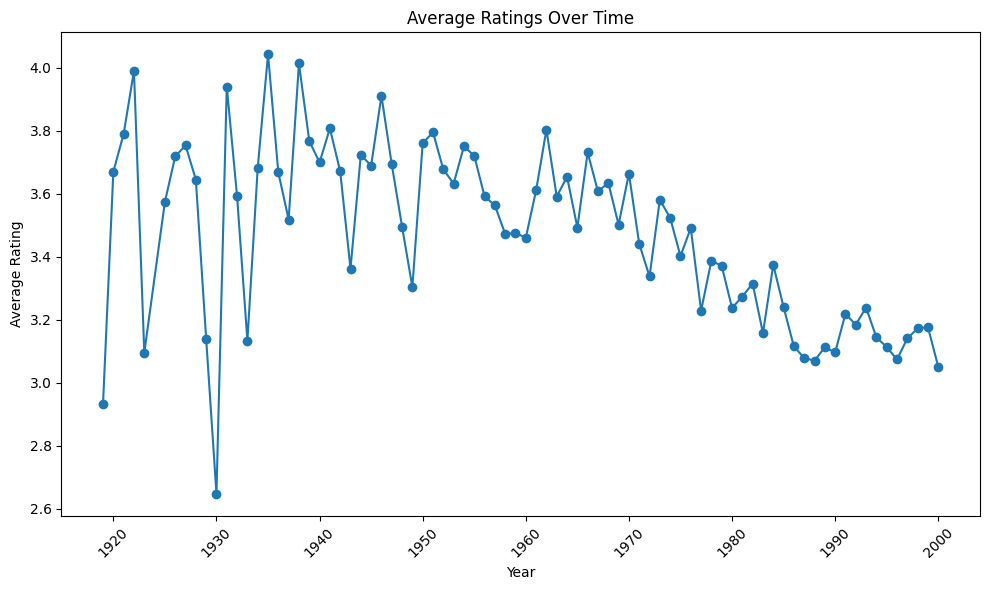

In [5]:
# Lets visualise the average ratings over time

# Extracting the year from the 'Title' column using regular expressions
movies_statistics_df['Year'] = movies_statistics_df['Title'].str.extract(r'\((\d{4})\)$')

# Convert the 'Year' column to numeric
movies_statistics_df['Year'] = pd.to_numeric(movies_statistics_df['Year'], errors='coerce')

# Drop rows with NaN values in the 'Year' column
movies_statistics_df.dropna(subset=['Year'], inplace=True)

# Grouping by 'Year' and calculating average ratings
avg_ratings_over_time = movies_statistics_df.groupby('Year')['avg_rating'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_ratings_over_time['Year'], avg_ratings_over_time['avg_rating'], marker='o', linestyle='-')
plt.title('Average Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

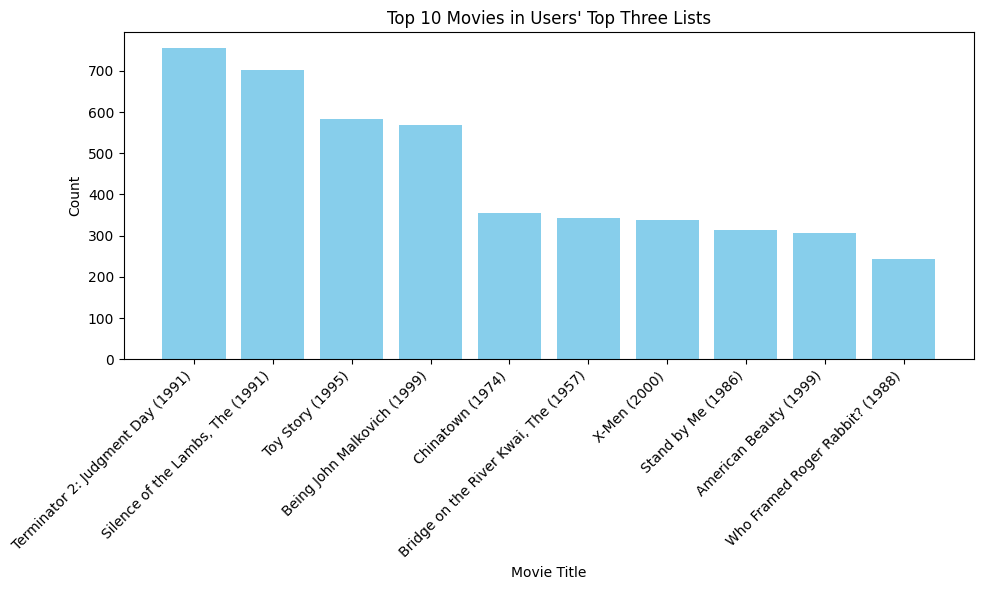

In [6]:
# Lets visualise the users top three data

# Get the top 10 movies and their counts in users' top three lists
top_10_movies = users_top_three_movies_df['Title'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
x_values = top_10_movies.index.tolist()  # Movie titles
y_values = top_10_movies.values.tolist()  # Counts

plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Movie Title')
plt.ylabel('Count')
plt.title('Top 10 Movies in Users\' Top Three Lists')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-labels
plt.tight_layout()
plt.show()